# Project: Wrangling and Analyze Data

In [1]:
import pandas as pd
import numpy as np
import requests
import os
import matplotlib.pyplot as plt
% matplotlib inline

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
archive = pd.read_csv('twitter-archive-enhanced.csv')
archive.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
req = requests.get(url)
with open (url.split('/')[-1], mode='wb') as file:
    file.write(req.content)

img = pd.read_csv('image-predictions.tsv', sep='\t')
img.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv

#NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Fail
2: 892177421306343426
Fail
3: 891815181378084864
Fail
4: 891689557279858688
Fail
5: 891327558926688256
Fail
6: 891087950875897856
Fail
7: 890971913173991426
Fail
8: 890729181411237888
Fail
9: 890609185150312448
Fail
10: 890240255349198849
Fail
11: 890006608113172480
Fail
12: 889880896479866881
Fail
13: 889665388333682689
Fail
14: 889638837579907072
Fail
15: 889531135344209921
Fail
16: 889278841981685760
Fail
17: 888917238123831296
Fail
18: 888804989199671297
Fail
19: 888554962724278272
Fail
20: 888202515573088257
Fail
21: 888078434458587136
Fail
22: 887705289381826560
Fail
23: 887517139158093824
Fail
24: 887473957103951883
Fail
25: 887343217045368832
Fail
26: 887101392804085760
Fail
27: 886983233522544640
Fail
28: 886736880519319552
Fail
29: 886680336477933568
Fail
30: 886366144734445568
Fail
31: 886267009285017600
Fail
32: 886258384151887873
Fail
33: 886054160059072513
Fail
34: 885984800019947520
Fail
35: 885528943205470208
Fail
36: 885518971528720385
Fail
3

Fail
288: 838561493054533637
Fail
289: 838476387338051585
Fail
290: 838201503651401729
Fail
291: 838150277551247360
Fail
292: 838085839343206401
Fail
293: 838083903487373313
Fail
294: 837820167694528512
Fail
295: 837482249356513284
Fail
296: 837471256429613056
Fail
297: 837366284874571778
Fail
298: 837110210464448512
Fail
299: 837012587749474308
Fail
300: 836989968035819520
Fail
301: 836753516572119041
Fail
302: 836677758902222849
Fail
303: 836648853927522308
Fail
304: 836397794269200385
Fail
305: 836380477523124226
Fail
306: 836260088725786625
Fail
307: 836001077879255040
Fail
308: 835685285446955009
Fail
309: 835574547218894849
Fail
310: 835536468978302976
Fail
311: 835309094223372289
Fail
312: 835297930240217089
Fail
313: 835264098648616962
Fail
314: 835246439529840640
Fail
315: 835172783151792128
Fail
316: 835152434251116546
Fail
317: 834931633769889797
Fail
318: 834786237630337024
Fail
319: 834574053763584002
Fail
320: 834477809192075265
Fail
321: 834458053273591808
Fail
322: 8342

In [5]:
tweet_info = []
import json 

with open('tweet-json.txt', encoding='utf-8') as js_file:
    for i in js_file:
        data = json.loads(i)
        tweet_id = data['id']
        tweet = data['full_text']
        tweet_url = tweet[tweet.find('https'):]
        favorite_count = data['favorite_count']
        retweet_count = data['retweet_count']  
        retweet_status = data['retweet_status'] = data.get('retweet_status', 'Original tweet')
        if retweet_status == 'Original tweet':
            url = tweet_url
        else:
            retweeted_status = 'A retweet'
            url = 'A retweet'
        
    
        tweet_info.append({'tweet_id': tweet_id,'favorite_count': favorite_count,'retweet_status': retweet_status,
                     'url': url,'retweet_count': retweet_count})

tweets = pd.DataFrame(tweet_info, columns = ['tweet_id', 'favorite_count','retweet_count', 'retweet_status', 'url'])                                                     
tweets.head()

,tweet_id,favorite_count,retweet_count,retweet_status,url
0,892420643555336193,39467,8853,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,33819,6514,Original tweet,https://t.co/0Xxu71qeIV
2,891815181378084864,25461,4328,Original tweet,https://t.co/wUnZnhtVJB
3,891689557279858688,42908,8964,Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,41048,9774,Original tweet,https://t.co/AtUZn91f7f


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### Inspect archives df

In [6]:
archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [7]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [8]:
archive.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

In [9]:
null_cols = archive.columns[archive.isnull().any()]
archive[null_cols].isnull().sum()

in_reply_to_status_id         2278
in_reply_to_user_id           2278
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
dtype: int64

In [10]:
archive.duplicated().any()

False

In [11]:
archive['name'].value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
Oliver         11
Penny          10
Lola           10
Tucker         10
Bo              9
Winston         9
the             8
Sadie           8
Buddy           7
an              7
Daisy           7
Toby            7
Bailey          7
Bella           6
Scout           6
Stanley         6
Jack            6
Leo             6
Oscar           6
Dave            6
Milo            6
Koda            6
Jax             6
Rusty           6
Sunny           5
             ... 
Jo              1
Socks           1
Fletcher        1
Mookie          1
Schnozz         1
Ron             1
Christoper      1
Arlo            1
Kellogg         1
Pubert          1
Swagger         1
Geoff           1
Angel           1
Jazz            1
Shnuggles       1
Emma            1
Torque          1
Mary            1
Ralphy          1
DonDon          1
Cheesy          1
Sparky          1
Meera           1
Hubertson       1
Kirk      

In [12]:
archive['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [13]:
archive['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

### Inspect img df

In [14]:
img.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [15]:
img.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [16]:
img.dtypes

tweet_id      int64
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

In [17]:
null_cols = img.columns[img.isnull().any()]
img[null_cols].isnull().sum()

Series([], dtype: float64)

In [18]:
img.duplicated().any()

False

In [19]:
img['p1'].value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            23
seat_belt                     22
Siberian_husky                20
Staffordshire_bullterrier     20
German_shepherd               20
Cardigan                      19
web_site                      19
beagle                        18
Shetland_sheepdog             18
teddy                         18
Maltese_dog                   18
Eskimo_dog                    18
Lakeland_terrier              17
Rottweiler                    17
Shih-Tzu                      17
kuvasz                        16
Italian_greyhound             16
          

In [20]:
img['p2'].value_counts()

Labrador_retriever                104
golden_retriever                   92
Cardigan                           73
Chihuahua                          44
Pomeranian                         42
Chesapeake_Bay_retriever           41
French_bulldog                     41
toy_poodle                         37
cocker_spaniel                     34
Siberian_husky                     33
miniature_poodle                   33
beagle                             28
Eskimo_dog                         27
Pembroke                           27
collie                             27
kuvasz                             26
Italian_greyhound                  22
American_Staffordshire_terrier     21
Pekinese                           21
Samoyed                            20
toy_terrier                        20
chow                               20
miniature_pinscher                 20
malinois                           20
Norwegian_elkhound                 19
Boston_bull                        19
Staffordshir

In [21]:
img['p3'].value_counts()

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
chow                              32
Staffordshire_bullterrier         32
beagle                            31
cocker_spaniel                    31
Pekinese                          29
Pomeranian                        29
toy_poodle                        29
Great_Pyrenees                    27
Pembroke                          27
Chesapeake_Bay_retriever          27
French_bulldog                    26
malamute                          26
American_Staffordshire_terrier    24
pug                               23
Cardigan                          23
basenji                           21
toy_terrier                       20
bull_mastiff                      20
Siberian_husky                    19
Shetland_sheepdog                 17
Boston_bull                       17
L

### Inspect tweets df

In [22]:
tweets.head()

,tweet_id,favorite_count,retweet_count,retweet_status,url
0,892420643555336193,39467,8853,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,33819,6514,Original tweet,https://t.co/0Xxu71qeIV
2,891815181378084864,25461,4328,Original tweet,https://t.co/wUnZnhtVJB
3,891689557279858688,42908,8964,Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,41048,9774,Original tweet,https://t.co/AtUZn91f7f


In [23]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 5 columns):
tweet_id          2354 non-null int64
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
retweet_status    2354 non-null object
url               2354 non-null object
dtypes: int64(3), object(2)
memory usage: 92.0+ KB


In [24]:
tweets.dtypes

tweet_id           int64
favorite_count     int64
retweet_count      int64
retweet_status    object
url               object
dtype: object

In [25]:
null_cols = tweets.columns[tweets.isnull().any()]
tweets[null_cols].isnull().sum()

Series([], dtype: float64)

In [26]:
tweets.duplicated().any()

False

In [27]:
tweets['retweet_status'].value_counts()

Original tweet    2354
Name: retweet_status, dtype: int64

### Quality issues
1.  retweeted_status_timestamp in archive df is not a date-time datatype. 

2. Invalid dog names such as 'the', 'None', 'a' or 'an'

3. Invalid dog types for p1, p2, p3 columns in img df such as 'web_site', 'nail', 'grocery_store'.

4. Names in p1, p2, p3 are inconsistent as some are capitalized and some are all lower case.

5. Names in p1, p2, p3 also contain underscores for some values.

6. timestamp in archive df is not a date-time datatype.

7. Missing values in mulitple columns (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls) for archive df.


8. Retweets contained in data

### Tidiness issues
1. dogoo, floofer, pupper, puppo columns in archive df should be 1 column.

2. All 3 data frames should be combined together as they're all part of the same tweet information

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [28]:
# Make copies of original pieces of data
archive_copy = archive.copy()
img_copy = img.copy()
tweets_copy = tweets.copy()

### Issue #1 All 3 datasets are related and should be combined

#### Define: Combine the 3 dataframes into 1 single dataframe with all the info using the cocnat() function

#### Code

In [29]:
df = pd.concat([archive_copy, img_copy, tweets_copy], join='outer', axis=1)

In [30]:
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,tweet_id,favorite_count,retweet_count,retweet_status,url
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.156665,True,Shetland_sheepdog,0.061428,True,8.924206e+17,39467.0,8853.0,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.074192,True,Rhodesian_ridgeback,0.072010,True,8.921774e+17,33819.0,6514.0,Original tweet,https://t.co/0Xxu71qeIV
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,0.138584,True,bloodhound,0.116197,True,8.918152e+17,25461.0,4328.0,Original tweet,https://t.co/wUnZnhtVJB
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,0.360687,True,miniature_pinscher,0.222752,True,8.916896e+17,42908.0,8964.0,Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,0.243682,True,Doberman,0.154629,True,8.913276e+17,41048.0,9774.0,Original tweet,https://t.co/AtUZn91f7f


#### Test

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 34 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
tweet_id                      20

In [32]:
df.shape

(2356, 34)

### Issue #2: Dog type should be 1 single column

#### Define: Create a new column to store the 4 dog types

#### Code

In [33]:
df['dog_type'] = df['text'].str.extract('(doggo|floofer|pupper|puppo)')

#### Test

In [34]:
df.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p2_dog,p3,p3_conf,p3_dog,tweet_id,favorite_count,retweet_count,retweet_status,url,dog_type
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,True,Shetland_sheepdog,0.061428,True,8.924206e+17,39467.0,8853.0,Original tweet,https://t.co/MgUWQ76dJU,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,True,Rhodesian_ridgeback,0.072010,True,8.921774e+17,33819.0,6514.0,Original tweet,https://t.co/0Xxu71qeIV,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,True,bloodhound,0.116197,True,8.918152e+17,25461.0,4328.0,Original tweet,https://t.co/wUnZnhtVJB,NaN


In [35]:
df.dog_type.value_counts()

pupper     265
doggo       93
puppo       37
floofer      4
Name: dog_type, dtype: int64

### Issue #3: retweeted_status_timestamp not in date-time datatype

#### Define: Change data type to date-time from str

#### Code

In [36]:
df['retweeted_status_timestamp'] = pd.to_datetime(df['retweeted_status_timestamp'], format = "%Y-%m-%d ")

#### Test

In [37]:
df.dtypes

tweet_id                               int64
in_reply_to_status_id                float64
in_reply_to_user_id                  float64
timestamp                             object
source                                object
text                                  object
retweeted_status_id                  float64
retweeted_status_user_id             float64
retweeted_status_timestamp    datetime64[ns]
expanded_urls                         object
rating_numerator                       int64
rating_denominator                     int64
name                                  object
doggo                                 object
floofer                               object
pupper                                object
puppo                                 object
tweet_id                             float64
jpg_url                               object
img_num                              float64
p1                                    object
p1_conf                              float64
p1_dog    

### Issue #4: Remove data and columns related to retweets

#### Define: Drop retweets and retweet related columns

#### Code

In [38]:
df = df.drop(['retweet_status','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'], axis=1)

#### Test

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 31 columns):
tweet_id                 2356 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2356 non-null object
source                   2356 non-null object
text                     2356 non-null object
expanded_urls            2297 non-null object
rating_numerator         2356 non-null int64
rating_denominator       2356 non-null int64
name                     2356 non-null object
doggo                    2356 non-null object
floofer                  2356 non-null object
pupper                   2356 non-null object
puppo                    2356 non-null object
tweet_id                 2075 non-null float64
jpg_url                  2075 non-null object
img_num                  2075 non-null float64
p1                       2075 non-null object
p1_conf                  2075 non-null float64
p1_dog               

### Issue #5: Multiple columns with missing values

#### Define: Drop columns with missing values and those that are not needed

#### Code

In [40]:
df = df.drop(['in_reply_to_status_id','in_reply_to_user_id','expanded_urls', 'doggo', 'floofer', 'pupper', 'puppo'], axis=1)

#### Test

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 24 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null object
source                2356 non-null object
text                  2356 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
tweet_id              2075 non-null float64
jpg_url               2075 non-null object
img_num               2075 non-null float64
p1                    2075 non-null object
p1_conf               2075 non-null float64
p1_dog                2075 non-null object
p2                    2075 non-null object
p2_conf               2075 non-null float64
p2_dog                2075 non-null object
p3                    2075 non-null object
p3_conf               2075 non-null float64
p3_dog                2075 non-null object
tweet_id              2354 non-null float64
favorite_count        2354 non

### Issue #6: timestamp is not date-time datatype

#### Define: Change datatype from str to date-time

#### Code

In [42]:
df['timestamp'] = pd.to_datetime(df['timestamp'], format = "%Y-%m-%d ")

#### Test

In [43]:
df.dtypes

tweet_id                       int64
timestamp             datetime64[ns]
source                        object
text                          object
rating_numerator               int64
rating_denominator             int64
name                          object
tweet_id                     float64
jpg_url                       object
img_num                      float64
p1                            object
p1_conf                      float64
p1_dog                        object
p2                            object
p2_conf                      float64
p2_dog                        object
p3                            object
p3_conf                      float64
p3_dog                        object
tweet_id                     float64
favorite_count               float64
retweet_count                float64
url                           object
dog_type                      object
dtype: object

In [44]:
df.head(1)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,tweet_id,jpg_url,img_num,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,tweet_id,favorite_count,retweet_count,url,dog_type
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,6.660209e+17,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1.0,...,0.156665,True,Shetland_sheepdog,0.061428,True,8.924206e+17,39467.0,8853.0,https://t.co/MgUWQ76dJU,NaN


### Issue #7: Invalid names like 'a', 'an', 'the' etc.

#### Define: Replace invalid names with 'None'

#### Code

In [45]:
df['name'] = df['name'].replace(['a', 'an', 'the'], 'None')

#### Test

In [46]:
df.query('name == "a"')

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,tweet_id,jpg_url,img_num,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,tweet_id,favorite_count,retweet_count,url,dog_type


### Issue #8: Invalid names like 'web_site', 'nail', 'grocery store' etc. in p1,p2,p3

#### Define: Replace invalid names with 'None'

#### Code

In [47]:
df['p1'] = df['p1'].replace(['web_site'], 'None' )

In [48]:
df['p2'] = df['p2'].replace(['stove', 'nail'], 'None')

In [49]:
df['p3'] = df['p3'].replace(['conch', 'goldfish', 'spatula', 'grocery_store'], 'None' )

#### Test

In [50]:
df.query('p1 == "web_site"')

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,tweet_id,jpg_url,img_num,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,tweet_id,favorite_count,retweet_count,url,dog_type


In [51]:
df.query('p2 == "stove"')

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,tweet_id,jpg_url,img_num,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,tweet_id,favorite_count,retweet_count,url,dog_type


In [52]:
df.query('p3 == "goldfish"')

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,tweet_id,jpg_url,img_num,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,tweet_id,favorite_count,retweet_count,url,dog_type


### Issue #9: p1, p2, p3 names are not consistent as some are lower case, some are upper case

#### Define: Set all values to lower case

#### Code

In [53]:
df['p1'] = df['p1'].str.lower()

In [54]:
df['p2'] = df['p2'].str.lower()

In [55]:
df['p3'] = df['p3'].str.lower()

#### Test

In [56]:
df['p1'].str.islower().any()

True

In [57]:
df['p2'].str.islower().any()

True

In [58]:
df['p3'].str.islower().any()

True

### Issue #10: p1, p2, p3 names are not consistent as some have underscores

#### Define: Replace all underscores with spaces

#### Code

In [59]:
df['p1'] = df['p1'].str.replace(r"_", " ", regex=True)

In [60]:
df['p2'] = df['p2'].str.replace(r"_", " ", regex=True)

In [61]:
df['p3'] = df['p3'].str.replace(r"_", " ", regex=True)

#### Test

In [62]:
df.query('p2 == "labrador_retriever"')

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,tweet_id,jpg_url,img_num,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,tweet_id,favorite_count,retweet_count,url,dog_type


In [63]:
df.query('p2 == "labrador retriever"')

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,tweet_id,jpg_url,img_num,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,tweet_id,favorite_count,retweet_count,url,dog_type
37,885167619883638784,2017-07-12 16:03:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a corgi undercover as a malamute....,13,10,None,6.664547e+17,https://pbs.twimg.com/media/CT-5Bs-WUAA2JeC.jpg,1.0,...,0.237612,True,great pyrenees,0.171106,True,8.849255e+17,68152.0,16439.0,https://t.co/MYJvdlNRVa,NaN
54,881666595344535552,2017-07-03 00:11:11,"<a href=""http://twitter.com/download/iphone"" r...",This is Gary. He couldn't miss this puppertuni...,13,10,Gary,6.670441e+17,https://pbs.twimg.com/media/CUHREBXXAAE6A9b.jpg,1.0,...,0.206694,True,seat belt,0.010667,False,8.816333e+17,129.0,7.0,s,pupper
72,878604707211726852,2017-06-24 13:24:20,"<a href=""http://twitter.com/download/iphone"" r...",Martha is stunning how h*ckin dare you. 13/10 ...,13,10,None,6.672119e+17,https://pbs.twimg.com/media/CUJppKJWoAA75NP.jpg,1.0,...,0.454937,True,kuvasz,0.024193,True,8.784048e+17,0.0,1349.0,https:/…,NaN
85,876120275196170240,2017-06-17 16:52:05,"<a href=""http://twitter.com/download/iphone"" r...","Meet Venti, a seemingly caffeinated puppoccino...",13,10,Venti,6.675094e+17,https://pbs.twimg.com/media/CUN4Or5UAAAa5K4.jpg,1.0,...,0.119256,True,golden retriever,0.082549,True,8.757478e+17,25773.0,4497.0,https://t.co/V2WlACRJCN,puppo
133,866720684873056260,2017-05-22 18:21:28,"<a href=""http://twitter.com/download/iphone"" r...",He was providing for his family 13/10 how dare...,13,10,None,6.684800e+17,https://pbs.twimg.com/media/CUbrDWOWcAEyMdM.jpg,1.0,...,0.099965,True,pug,0.086717,True,8.666868e+17,20070.0,3727.0,https://t.co/9b9J46E86Z,NaN
180,857062103051644929,2017-04-26 02:41:43,"<a href=""http://twitter.com/download/iphone"" r...",RT @AaronChewning: First time wearing my @dog_...,13,10,None,6.693272e+17,https://pbs.twimg.com/media/CUntin8WIAADmLk.jpg,1.0,...,0.049669,True,kuvasz,0.010216,True,8.570298e+17,19910.0,4364.0,https://t.co/uMH5CLjXJu,NaN
359,829878982036299777,2017-02-10 02:25:42,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Loki. He smiles like El...,12,10,Loki,6.726223e+17,https://pbs.twimg.com/media/CVWicBbUYAIomjC.jpg,1.0,...,0.010835,True,clumber,0.008786,True,8.298614e+17,13441.0,2243.0,https://t.co/xeudgDXmTU,doggo
380,827600520311402496,2017-02-03 19:31:54,"<a href=""http://twitter.com/download/iphone"" r...",Meet Tucker. It's his birthday. He's pupset wi...,13,10,Tucker,6.732953e+17,https://pbs.twimg.com/media/CVgGc9hWIAIe1bn.jpg,1.0,...,0.064683,True,great pyrenees,0.012613,True,8.273249e+17,17523.0,3510.0,https://t.co/UU3KqQF5n5,NaN
387,826598799820865537,2017-02-01 01:11:25,"<a href=""http://twitter.com/download/iphone"" r...","I was going to do 007/10, but the joke wasn't ...",7,10,None,6.733521e+17,https://pbs.twimg.com/media/CVg6L2hWIAAYuEb.jpg,1.0,...,0.275885,True,kuvasz,0.022255,True,8.265984e+17,11117.0,2709.0,https://t.co/YprN62Z74I,NaN
438,820013781606658049,2017-01-13 21:04:55,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Oliver. He has dreams o...,13,10,Oliver,6.744223e+17,https://pbs.twimg.com/media/CVwHgblWcAACWOD.jpg,1.0,...,0.009006,True,tennis ball,0.007139,False,8.199522e+17,5927.0,1369.0,https://t.co/f5WMsx0a9K https://t.co/6lJz0DKZIb,puppo


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [64]:
df.to_csv('twitter_archive_master.csv', encoding='utf-8')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [65]:
master = pd.read_csv('twitter_archive_master.csv')
master.head(3)

,Unnamed: 0,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,tweet_id.1,jpg_url,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,tweet_id.2,favorite_count,retweet_count,url,dog_type
0,0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,6.660209e+17,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,...,0.156665,True,shetland sheepdog,0.061428,True,8.924206e+17,39467.0,8853.0,https://t.co/MgUWQ76dJU,NaN
1,1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,6.660293e+17,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,...,0.074192,True,rhodesian ridgeback,0.072010,True,8.921774e+17,33819.0,6514.0,https://t.co/0Xxu71qeIV,NaN
2,2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,6.660334e+17,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,...,0.138584,True,bloodhound,0.116197,True,8.918152e+17,25461.0,4328.0,https://t.co/wUnZnhtVJB,NaN


In [66]:
master.drop(['Unnamed: 0'] , axis = 1 , inplace = True)

# Insight 1 - Most common Dog Type

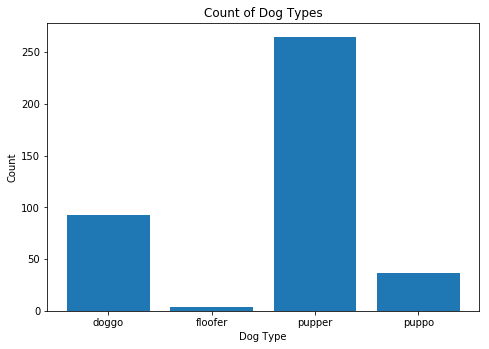

In [67]:
count=list(master['dog_type'].value_counts().sort_values())
label=list(master['dog_type'].value_counts().sort_values().index)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(label,count)
plt.xlabel("Dog Type")
plt.ylabel("Count")
ax.set_title("Count of Dog Types")
plt.show()

# Insights 2 - Most common rating

In [74]:
master['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

# Insight 3 - Most common dog name

In [79]:
names = master.query('name != "None"')
names.groupby('name').size().sort_values(ascending = False)

name
Charlie      12
Oliver       11
Lucy         11
Cooper       11
Tucker       10
Lola         10
Penny        10
Bo            9
Winston       9
Sadie         8
Toby          7
Buddy         7
Daisy         7
Bailey        7
Scout         6
Jax           6
Oscar         6
Jack          6
Dave          6
Rusty         6
Milo          6
Bella         6
Stanley       6
Leo           6
Koda          6
Gus           5
Louis         5
Finn          5
Sunny         5
Sammy         5
             ..
Jiminus       1
Jimbo         1
Jim           1
Jett          1
Jessiga       1
Jessifer      1
Spencer       1
Jersey        1
Josep         1
Juckson       1
Kellogg       1
Julio         1
Sonny         1
Keet          1
Kayla         1
Kawhi         1
Katie         1
Kathmandu     1
Karma         1
Karll         1
Karl          1
Kara          1
Kanu          1
Kane          1
Kallie        1
Kaiya         1
Kaia          1
Sora          1
Julius        1
Kial          1
Length: 953, dtype:

# Insight 4 - Correlation between retweets and favorites

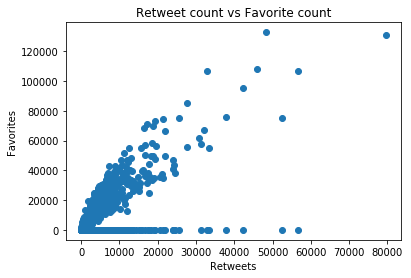

In [70]:
plt.title("Retweet count vs Favorite count")
plt.xlabel("Retweets")
plt.ylabel("Favorites")
plt.scatter(x=master['retweet_count'], y=master['favorite_count'])

### Insights:
1. Most common dog type is a 'pupper'

2. 12 is the most common rating numerator given

3. Charlie is the most common dog name

4. There seems to be a positive correlation between retweet counts and favorite counts